In [1]:
import torch
import os

print(os.getcwd())
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/sumit/assignment9


In [2]:
!git clone https://github.com/sumitsarkar1/assignment9.git

Cloning into 'assignment9'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 63 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [3]:
os.chdir('./assignment9/')
print(os.getcwd())

/home/sumit/assignment9/assignment9


In [4]:
!git clone https://github.com/sumitsarkar1/sumitEVA7.git

Cloning into 'sumitEVA7'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 86 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [5]:
%mv sumitEVA7/pytorch_grad_cam/ .

In [6]:
from assignment9 import main

net = main.getModel()
net = net.to(device)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [7]:
SEED = 1

use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [8]:
!pip install torchsummary

from torchsummary import summary
device = torch.device("cuda" if use_cuda else "cpu")

In [9]:
net = net.to(device)
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [10]:
import torch.optim as optim

from main import args
myargs = args()
myargs.batch_size = 512
epochs = 24
lr = 0.012

trainloader = main.getTrainLoader(myargs)
testloader = main.getTestLoader(myargs)

max_lr = 0.012
pct_start = 0.2083 #5/24
div_factor = 30
steps_per_epoch = len(trainloader)
final_div_factor = 1 # NO ANNIHILATION

optimizer = main.setOptimizer(net, lr)
scheduler = main.setScheduler(optimizer, epochs, max_lr, steps_per_epoch, pct_start, div_factor, final_div_factor)

torch.cuda.empty_cache()

for epoch in range(epochs):
    print("EPOCH:", epoch+1)
    main.train(net, optimizer, scheduler, trainloader, device)
    main.test(net, testloader, device)

/home/sumit/anaconda3/envs/resnet/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified
EPOCH: 1


Loss=1.1368443965911865 Batch_id=97 Train Accuracy=47.43: 100%|█| 98/98 [00:21<0



Test set: Average loss: 0.0023, Accuracy: 6068/10000 (60.68%)

EPOCH: 2


Loss=0.9357207417488098 Batch_id=97 Train Accuracy=62.75: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0023, Accuracy: 6447/10000 (64.47%)

EPOCH: 3


Loss=0.8437106013298035 Batch_id=97 Train Accuracy=67.21: 100%|█| 98/98 [00:21<0



Test set: Average loss: 0.0017, Accuracy: 7176/10000 (71.76%)

EPOCH: 4


Loss=0.835432231426239 Batch_id=97 Train Accuracy=70.73: 100%|█| 98/98 [00:21<00



Test set: Average loss: 0.0028, Accuracy: 6106/10000 (61.06%)

EPOCH: 5


Loss=0.6894718408584595 Batch_id=97 Train Accuracy=74.44: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0013, Accuracy: 7908/10000 (79.08%)

EPOCH: 6


Loss=0.620741069316864 Batch_id=97 Train Accuracy=78.03: 100%|█| 98/98 [00:22<00



Test set: Average loss: 0.0012, Accuracy: 8135/10000 (81.35%)

EPOCH: 7


Loss=0.5889041423797607 Batch_id=97 Train Accuracy=80.21: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0010, Accuracy: 8275/10000 (82.75%)

EPOCH: 8


Loss=0.5201399326324463 Batch_id=97 Train Accuracy=82.09: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0009, Accuracy: 8565/10000 (85.65%)

EPOCH: 9


Loss=0.5004244446754456 Batch_id=97 Train Accuracy=83.30: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0008, Accuracy: 8709/10000 (87.09%)

EPOCH: 10


Loss=0.48144590854644775 Batch_id=97 Train Accuracy=84.55: 100%|█| 98/98 [00:22<



Test set: Average loss: 0.0008, Accuracy: 8694/10000 (86.94%)

EPOCH: 11


Loss=0.3705224394798279 Batch_id=97 Train Accuracy=85.52: 100%|█| 98/98 [00:23<0



Test set: Average loss: 0.0007, Accuracy: 8840/10000 (88.40%)

EPOCH: 12


Loss=0.34929826855659485 Batch_id=97 Train Accuracy=86.71: 100%|█| 98/98 [00:23<



Test set: Average loss: 0.0007, Accuracy: 8920/10000 (89.20%)

EPOCH: 13


Loss=0.2841922342777252 Batch_id=97 Train Accuracy=87.38: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0006, Accuracy: 9035/10000 (90.35%)

EPOCH: 14


Loss=0.4283957779407501 Batch_id=97 Train Accuracy=88.28: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0006, Accuracy: 8955/10000 (89.55%)

EPOCH: 15


Loss=0.4161997437477112 Batch_id=97 Train Accuracy=89.18: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0006, Accuracy: 8955/10000 (89.55%)

EPOCH: 16


Loss=0.2322094738483429 Batch_id=97 Train Accuracy=90.11: 100%|█| 98/98 [00:21<0



Test set: Average loss: 0.0006, Accuracy: 9082/10000 (90.82%)

EPOCH: 17


Loss=0.24220634996891022 Batch_id=97 Train Accuracy=90.93: 100%|█| 98/98 [00:22<



Test set: Average loss: 0.0005, Accuracy: 9205/10000 (92.05%)

EPOCH: 18


Loss=0.32704347372055054 Batch_id=97 Train Accuracy=91.51: 100%|█| 98/98 [00:22<



Test set: Average loss: 0.0005, Accuracy: 9238/10000 (92.38%)

EPOCH: 19


Loss=0.2426542043685913 Batch_id=97 Train Accuracy=92.28: 100%|█| 98/98 [00:22<0



Test set: Average loss: 0.0005, Accuracy: 9233/10000 (92.33%)

EPOCH: 20


Loss=0.11080318689346313 Batch_id=97 Train Accuracy=92.80: 100%|█| 98/98 [00:22<



Test set: Average loss: 0.0005, Accuracy: 9268/10000 (92.68%)

EPOCH: 21


Loss=0.15072710812091827 Batch_id=97 Train Accuracy=93.65: 100%|█| 98/98 [00:22<



Test set: Average loss: 0.0005, Accuracy: 9315/10000 (93.15%)

EPOCH: 22


Loss=0.12879112362861633 Batch_id=97 Train Accuracy=93.87: 100%|█| 98/98 [00:23<



Test set: Average loss: 0.0005, Accuracy: 9335/10000 (93.35%)

EPOCH: 23


Loss=0.1782904863357544 Batch_id=97 Train Accuracy=94.07: 100%|█| 98/98 [00:23<0



Test set: Average loss: 0.0004, Accuracy: 9327/10000 (93.27%)

EPOCH: 24


Loss=0.1502068042755127 Batch_id=97 Train Accuracy=94.32: 100%|█| 98/98 [00:23<0



Test set: Average loss: 0.0004, Accuracy: 9352/10000 (93.52%)



LR peak at :  4.989795918367347 th epoch


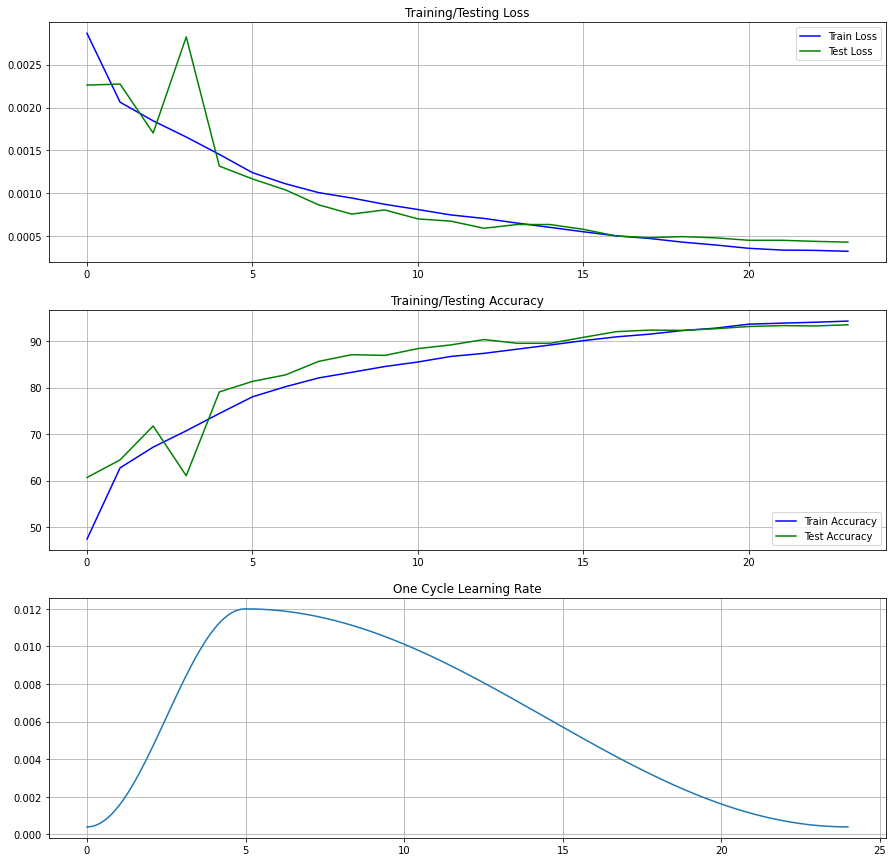

In [11]:
import matplotlib.pyplot as plt

train_losses = main.getTrainLoss()
test_losses = main.getTestLoss()
    
train_acc = main.getTrainAcc()
test_acc = main.getTestAcc()

lr_plot = main.getlrVals()
print("LR peak at : ", lr_plot.index(max(lr_plot))/98, "th epoch")

x_array = []
for x in range(0, epochs*98):
    x_array.append(x/98)
    
fig, axs = plt.subplots(3,1,figsize=(15,15))
axs[0].plot(train_losses, color='b', label='Train Loss')
axs[0].plot(test_losses, color='g', label='Test Loss')
axs[0].grid()
axs[1].plot(train_acc, color='b', label='Train Accuracy')
axs[1].plot(test_acc, color='g', label='Test Accuracy')
axs[1].grid()
axs[2].plot(x_array, lr_plot)
axs[2].grid()
axs[0].legend(loc="upper right")
axs[1].legend(loc="lower right")
axs[0].set_title("Training/Testing Loss")
axs[1].set_title("Training/Testing Accuracy")
axs[2].set_title("One Cycle Learning Rate")

plt.savefig('plot.jpg', bbox_inches='tight')

In [12]:
print(net)

Net(
  (residualblock1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (residualblock2): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (preplayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1

In [13]:
classes = ('Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck')

target_layers = [net.layer3[-1]]
print(target_layers)

import sumitEVA7
m_tgt, m_pred_labels, m_images, m_gcam_images = sumitEVA7.utils2.getMissMatchImages(net, target_layers)

[ReLU()]


<Figure size 432x288 with 0 Axes>

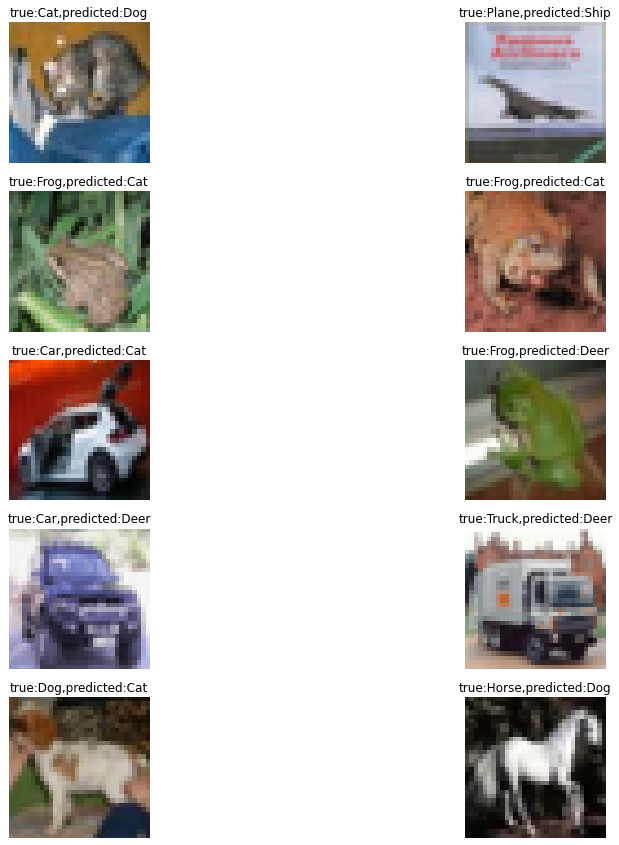

In [14]:
index = 0
figure = plt.figure()
plt.figure(figsize=(15,15))
num_of_images = 10
for index in range(1, num_of_images + 1):
    plt.subplot(5, 2, index)
    plt.axis('off')
    plt.gca().set_title('true:{0},predicted:{1}'.format(classes[m_tgt[index-1].item()], classes[m_pred_labels[index-1]]))
    plt.imshow(m_images[index-1], cmap='gray_r')

plt.savefig('missclassified.jpg', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

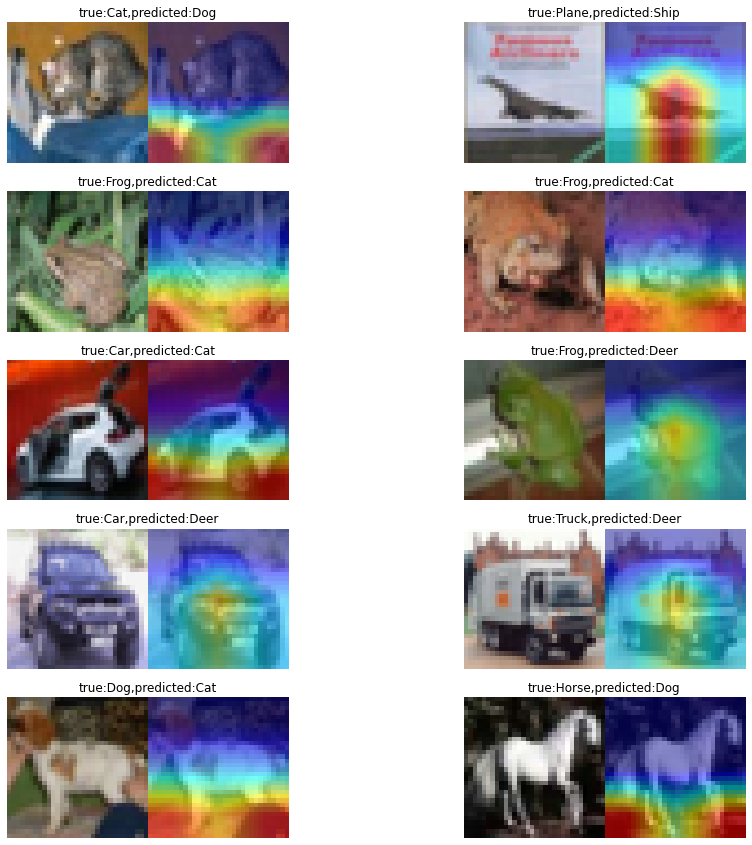

In [15]:
index = 0
figure = plt.figure()
plt.figure(figsize=(15,15))
num_of_images = 10
for index in range(1, num_of_images + 1):
    plt.subplot(5, 2, index)
    plt.axis('off')
    plt.gca().set_title('true:{0},predicted:{1}'.format(classes[m_tgt[index-1].item()], classes[m_pred_labels[index-1]]))
    plt.imshow(m_gcam_images[index-1], cmap='gray_r')

plt.savefig('missclassified_gradcam.jpg', bbox_inches='tight')

In [16]:
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    base_momentum: 0.85
    betas: (0.9499999288387241, 0.999)
    eps: 1e-08
    initial_lr: 0.0004
    lr: 0.0004000082547080063
    max_lr: 0.012
    max_momentum: 0.95
    min_lr: 0.0004
    weight_decay: 0
)


In [17]:
print(scheduler)